In [2]:
# Ian Álvarez
# Javier de la Cruz

Aquí están los resultados de los ejercicios sin todo lo que hemos estado tocando y haciendo

In [3]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy.signal as sg
import random
from tkinter import *
# gráficos en el notebook
%matplotlib inline

In [4]:
from const import *
from osc import *
from oscFM import  *
from modulator import *

Función player

In [5]:
''' Ahora en vez de sd.play, simplemente establecemos el valor de input como una de las clases osciladoras '''
input = None

def callback(outdata, frames, time, status):
    global input
    # print('entro')
    if input is not None:
        bloque = input.next()
        # convertimos formato (CHUNK,) a (CHUNK,1) para que adecuarlo a sounddevice
        outdata[:] = bloque.reshape(-1, 1)
    else:
        # si no hay datos, reproducimos silencio
        outdata[:] = np.zeros((CHUNK, 1))


# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2, callback=callback, blocksize=CHUNK)
stream.start()

In [6]:
input = None

In [7]:
input = Sine(440)

## 1.

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


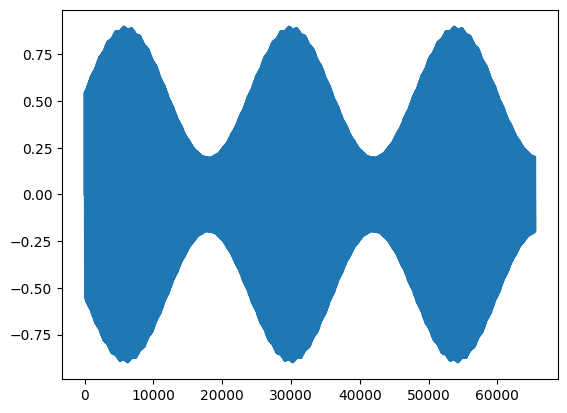

In [8]:
# Señal que vamos a modular
signal = Triangle(440)
# Con un modulador de 2 Hz y amplitud en [0.2, 0.9]
mod = Modulator(signal, freq=2, v0=0.2, v1=0.9)
# Generamos 1.5 segundos de señal modulada
time = 1.5
chunks = int(time * 44100 / 1024)
modulated_signal = np.empty(0)
for i in range(chunks):  # Generamos los chunks
    modulated_signal = np.append(modulated_signal, mod.next())
plt.plot(modulated_signal)
plt.show()

input = mod


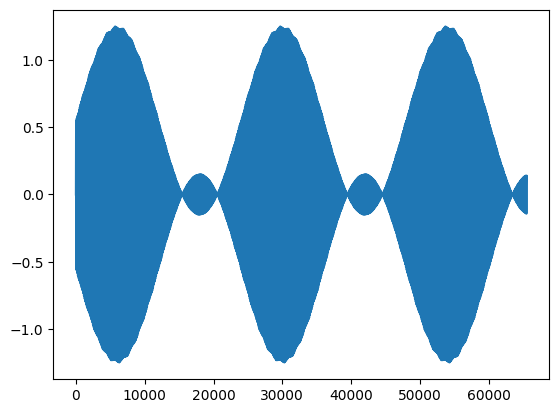

In [9]:
# Señal que vamos a modular
signal1 = Triangle(440)
signal2 = Sine(2, amp=2)
# Con un modulador de 2 Hz y amplitud en [0.2, 0.9]
mod = Modulator2(signal1, signal2, v0=0.2, v1=0.9)
# Generamos 1.5 segundos de señal modulada
time = 1.5
chunks = int(time * 44100 / 1024)
modulated_signal = np.empty(0)
for i in range(chunks):  # Generamos los chunks
    modulated_signal = np.append(modulated_signal, mod.next())


plt.plot(modulated_signal)
plt.show()

input = mod

## 2. 
Hemos hecho que la frecuencia aumente una nota cada vez y el volumen, .1

In [10]:
from tkinter import *
import numpy as np
from osc import *
import matplotlib.pyplot as plt
from const import *

# inicialización de la ventanas
root = Tk()

# Caja de texto
text = Text(root, height=6, width=60)
text.pack(side=BOTTOM)
text.insert(
    INSERT, "f bajar frecuencia\n F subir frecuencia\n v Bajar volumen\n V subir volumen\n")

freq = 0
amp = .7

if input == None:
    input = Sine(440)


def key_down(event):
    _notas = "CDEFGABcdefgab"
    global freq
    global amp
    if event.char == 'f':
        freq -= 1
        if freq < 0:
            freq = 0
        print("Frecuencia bajada: freq = " + _notas[freq])
        input.setFreq(notas[_notas[freq]])
    elif event.char == 'F':
        freq += 1
        if freq > len(notas) - 1:
            freq = len(notas) - 1
        print("Frecuencia subida: freq = " + _notas[freq])
        input.setFreq(notas[_notas[freq]])
    elif event.char == 'v':
        amp -= .1
        if amp < 0:
            amp = 0
        print("Volumen bajado: vol = " + str(amp))
        input.setAmp(amp)
    elif event.char == 'V':
        amp += .1
        if amp > 1:
            amp = 1
        print("Volumen subido: vol = " + str(amp))
        input.setAmp(amp)


# enlace de la pulsación de teclas con la función key_down
text.bind('<Key>', key_down)


# arrancamos todo!!
root.mainloop()
# ejecución bloqueada hasta que se cierre ventana
input = None


ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C
Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia bajada: freq = C


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 32, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia subida: freq = D
Frecuencia subida: freq = E


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia subida: freq = F
Frecuencia subida: freq = G


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia subida: freq = A
Frecuencia subida: freq = B


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia subida: freq = c
Frecuencia subida: freq = d


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


Frecuencia subida: freq = e


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.13/tkinter/__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "/tmp/ipykernel_3036/515308828.py", line 38, in key_down
    input.setFreq(notas[_notas[freq]])
    ^^^^^^^^^^^^^
AttributeError: 'Modulator2' object has no attribute 'setFreq'


## 3 y 7

In [11]:
from tkinter import *
from oscFM import *
import sounddevice as sd
from osc import *
from const import *
import matplotlib.pyplot as plt
from effects import *

# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2,
                         callback=callback, blocksize=CHUNK)

# inicialización de la ventanas
root = Tk()

# Caja de texto
text = Text(root, height=12, width=60)
text.pack(side=BOTTOM)
text.insert(INSERT, "f bajar frecuencia\n F subir frecuencia\n v Bajar volumen\n V subir volumen\n m Bajar FM\n M Subir FM\n b Bajar Beta\n B Subir Beta\n")

amp = .7
fm = 1000
beta = 0.1

osc = OscFM(440, amp=amp, chunk=CHUNK, fm=fm, beta=beta)
#probar el delay
input = Delay(osc, 3)

# #probar el eco
# input = Echo(osc, val=0.4, time=3/4, restar=True)

#sin nada
# input = osc

def key_down(event):
    _notas = "CDEFGABcdefgab"
    global osc
    global amp
    global beta
    global fm
    if event.char == 'f':
        print("Frecuencia bajada: freq = " + str(freq))
        osc.setFreq(osc.getFreq() - 10)
    elif event.char == 'F':
        print("Frecuencia subida: freq = " + str(freq))
        osc.setFreq(osc.getFreq() + 10)
    elif event.char == 'v':
        amp -= .1
        if amp < 0:
            amp = 0
        print("Volumen bajado: vol = " + str(amp))
        osc.setAmp(amp)
    elif event.char == 'V':
        amp += .1
        if amp > 1:
            amp = 1
        print("Volumen subido: vol = " + str(amp))
        osc.setAmp(amp)
    elif event.char == 'm':
        fm -= 10
        if fm < 0:
            fm = 0
        print("FM bajado: fm = " + str(fm))
        osc.setFM(fm)
    elif event.char == 'M':
        fm += 10
        print("FM subido: fm = " + str(fm))
        osc.setFM(fm)
    elif event.char == 'b':
        beta -= .1
        if beta < 0:
            beta = 0
        print("Beta bajado: beta = " + str(beta))
        osc.setBeta(beta)
    elif event.char == 'B':
        beta += .1
        print("Beta subido: beta = " + str(beta))
        osc.setBeta(beta)


# enlace de la pulsación de teclas con la función key_down
text.bind('<Key>', key_down)


# arrancamos todo!!
root.mainloop()
# ejecución bloqueada hasta que se cierre ventana
input = None

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
